In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39af99da03d082a40bbeea7bd6a0f6ef


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | iraan
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | mangaratiba
Processing Record 5 of Set 1 | mizdah
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | cascais
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | shache
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | togur
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | marcona
City not found. Skipping...
Processing Record 21 of Set 1 | saint-philip

Processing Record 36 of Set 4 | rungata
City not found. Skipping...
Processing Record 37 of Set 4 | paamiut
Processing Record 38 of Set 4 | krasnyy kut
Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | schwarzenbach
Processing Record 42 of Set 4 | batticaloa
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | yarada
Processing Record 46 of Set 4 | tha muang
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | atar
Processing Record 50 of Set 4 | maceio
Processing Record 1 of Set 5 | plettenberg bay
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | nalut
Processing Record 4 of Set 5 | elizabeth city
Processing Record 5 of Set 5 | ternate
Processing Record 6 of Set 5 | buala
Processing Record 7 of Set 5 | sobolevo
Pr

Processing Record 25 of Set 8 | nishihara
Processing Record 26 of Set 8 | pinan
Processing Record 27 of Set 8 | nanakuli
Processing Record 28 of Set 8 | yerbogachen
Processing Record 29 of Set 8 | xingcheng
Processing Record 30 of Set 8 | sola
Processing Record 31 of Set 8 | luanda
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | grindavik
Processing Record 34 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 35 of Set 8 | betong
Processing Record 36 of Set 8 | ilulissat
Processing Record 37 of Set 8 | mayor pablo lagerenza
Processing Record 38 of Set 8 | richards bay
Processing Record 39 of Set 8 | lhokseumawe
Processing Record 40 of Set 8 | marathon
Processing Record 41 of Set 8 | gainesville
Processing Record 42 of Set 8 | yulara
Processing Record 43 of Set 8 | alice springs
Processing Record 44 of Set 8 | quatre cocos
Processing Record 45 of Set 8 | bethanien
Processing Record 46 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record

Processing Record 14 of Set 12 | stenlose
Processing Record 15 of Set 12 | warqla
City not found. Skipping...
Processing Record 16 of Set 12 | vila
Processing Record 17 of Set 12 | ojinaga
Processing Record 18 of Set 12 | washington
Processing Record 19 of Set 12 | aguimes
Processing Record 20 of Set 12 | alta gracia
Processing Record 21 of Set 12 | tazovskiy
Processing Record 22 of Set 12 | kiama
Processing Record 23 of Set 12 | ocos
Processing Record 24 of Set 12 | minab
Processing Record 25 of Set 12 | beloha
Processing Record 26 of Set 12 | pauini
Processing Record 27 of Set 12 | karamay
City not found. Skipping...
Processing Record 28 of Set 12 | salalah
Processing Record 29 of Set 12 | dabat
Processing Record 30 of Set 12 | wawa
Processing Record 31 of Set 12 | ketchikan
Processing Record 32 of Set 12 | virginia beach
Processing Record 33 of Set 12 | ferme-neuve
Processing Record 34 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 35 of Set 12 | devec

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,71.60,88,97,8.05,CK,2020-07-12 22:13:48
1,Iraan,30.91,-101.90,104.00,4,4,8.99,US,2020-07-12 22:13:49
2,Butaritari,3.07,172.79,83.55,76,48,13.60,KI,2020-07-12 22:10:03
3,Mangaratiba,-22.96,-44.04,74.59,66,98,5.01,BR,2020-07-12 22:13:49
4,Mizdah,31.45,12.98,72.57,49,0,7.90,LY,2020-07-12 22:13:00
5,Sitka,57.05,-135.33,57.20,76,75,5.82,US,2020-07-12 22:10:11
6,Geraldton,-28.77,114.60,53.60,62,75,14.99,AU,2020-07-12 22:13:50
7,Hasaki,35.73,140.83,66.00,100,75,9.17,JP,2020-07-12 22:13:50
8,Jamestown,42.10,-79.24,73.99,73,1,10.29,US,2020-07-12 22:13:30
9,Ponta Do Sol,32.67,-17.10,69.01,75,0,3.83,PT,2020-07-12 22:10:07


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2020-07-12 22:13:48,-21.21,-159.78,71.60,88,97,8.05
1,Iraan,US,2020-07-12 22:13:49,30.91,-101.90,104.00,4,4,8.99
2,Butaritari,KI,2020-07-12 22:10:03,3.07,172.79,83.55,76,48,13.60
3,Mangaratiba,BR,2020-07-12 22:13:49,-22.96,-44.04,74.59,66,98,5.01
4,Mizdah,LY,2020-07-12 22:13:00,31.45,12.98,72.57,49,0,7.90
5,Sitka,US,2020-07-12 22:10:11,57.05,-135.33,57.20,76,75,5.82
6,Geraldton,AU,2020-07-12 22:13:50,-28.77,114.60,53.60,62,75,14.99
7,Hasaki,JP,2020-07-12 22:13:50,35.73,140.83,66.00,100,75,9.17
8,Jamestown,US,2020-07-12 22:13:30,42.10,-79.24,73.99,73,1,10.29
9,Ponta Do Sol,PT,2020-07-12 22:10:07,32.67,-17.10,69.01,75,0,3.83


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

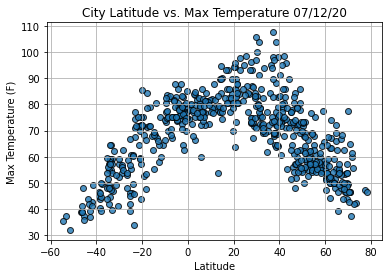

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [41]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/12/20'

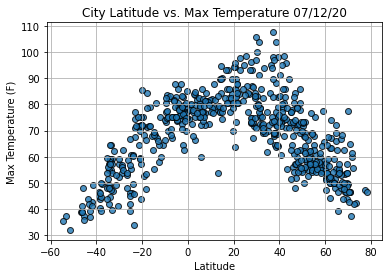

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

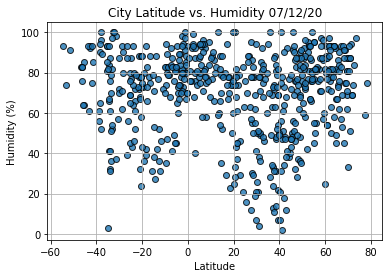

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

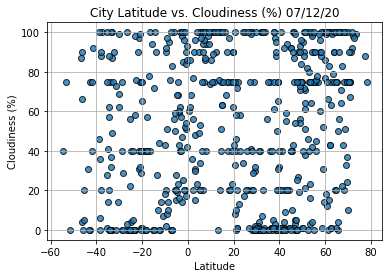

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

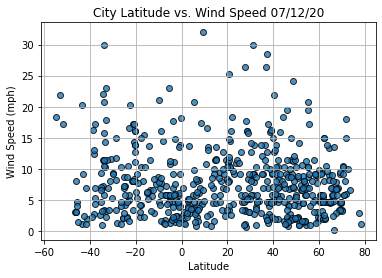

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [47]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                     Lorengau
Country                        PG
Date          2020-07-12 22:10:15
Lat                         -2.02
Lng                        147.27
Max Temp                    82.65
Humidity                       73
Cloudiness                     85
Wind Speed                   2.42
Name: 13, dtype: object

In [49]:
city_data_df["Lat"]>= 0

0      False
1       True
2       True
3      False
4       True
       ...  
577     True
578    False
579    False
580    False
581     True
Name: Lat, Length: 582, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2020-07-12 22:13:48,-21.21,-159.78,71.60,88,97,8.05
1,Iraan,US,2020-07-12 22:13:49,30.91,-101.90,104.00,4,4,8.99
2,Butaritari,KI,2020-07-12 22:10:03,3.07,172.79,83.55,76,48,13.60
3,Mangaratiba,BR,2020-07-12 22:13:49,-22.96,-44.04,74.59,66,98,5.01
4,Mizdah,LY,2020-07-12 22:13:00,31.45,12.98,72.57,49,0,7.90


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

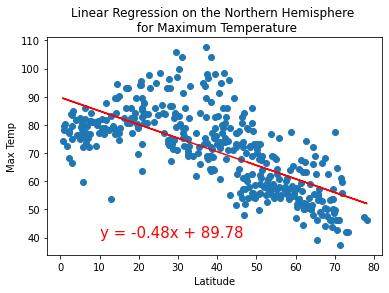

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature')
plot_linear_regression(x_values, y_values,'', 'Max Temp',(10,40))

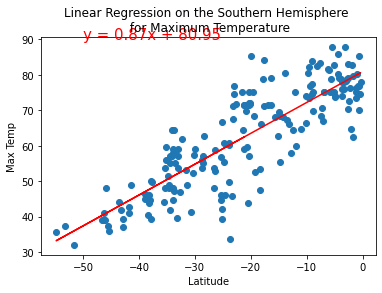

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title( 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature')
plot_linear_regression(x_values, y_values,'', 'Max Temp',(-50,90))

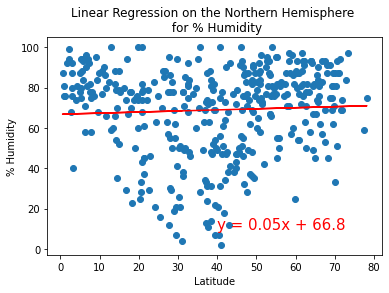

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity')
plot_linear_regression(x_values, y_values,'','% Humidity',(40,10))

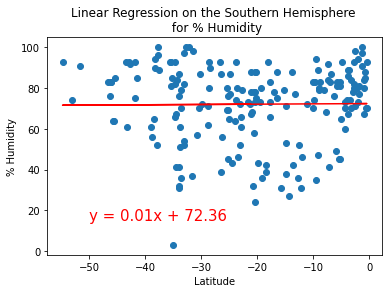

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title('Linear Regression on the Southern Hemisphere \n for % Humidity')
plot_linear_regression(x_values, y_values,'','% Humidity',(-50,15))

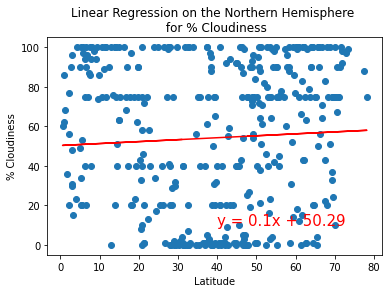

In [93]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness')
plot_linear_regression(x_values, y_values,'','% Cloudiness',(40,10))

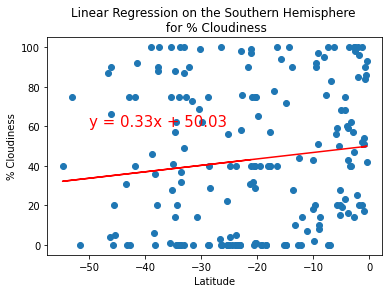

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title('Linear Regression on the Southern Hemisphere \n for % Cloudiness')
plot_linear_regression(x_values, y_values,'','% Cloudiness',(-50,60))

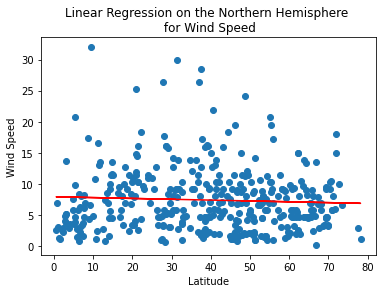

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed')
plot_linear_regression(x_values, y_values,'','Wind Speed',(40,35))

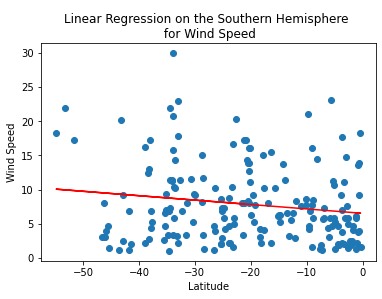

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed')
plot_linear_regression(x_values, y_values,'','Wind Speed',(-50,35))